##Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re
import pickle

In [3]:
# Loading the dataset
data = pd.read_csv('languageDataset.csv')

In [4]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \r\nThe concept of nature as a whole, t...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
# value count for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [6]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [7]:
# converting categorical variables to numerical
le = LabelEncoder()
y = le.fit_transform(y)

##Text Processing

In [9]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

##Bag of Words

In [10]:
# creating bag of words using countvectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [33]:
X.shape

(10337, 34937)

##Train Test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

##Model creation and Prediction

In [12]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [36]:
# prediction 
y_pred = model.predict(x_test)

##Evaluating the model

In [37]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [38]:
print("Accuracy is :",ac)

Accuracy is : 0.9709864603481625


In [39]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.99      0.91      0.95        86
           2       0.98      0.94      0.96       108
           3       0.88      1.00      0.94       293
           4       0.99      0.99      0.99       214
           5       0.99      0.99      0.99        94
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00         9
           8       0.98      0.99      0.98       145
           9       1.00      0.95      0.98        66
          10       1.00      0.98      0.99       122
          11       0.99      0.99      0.99       143
          12       1.00      0.96      0.98       125
          13       0.98      0.99      0.98       163
          14       0.94      0.95      0.95       124
          15       1.00      0.96      0.98       107
          16       1.00      0.86      0.93        95

    accuracy              

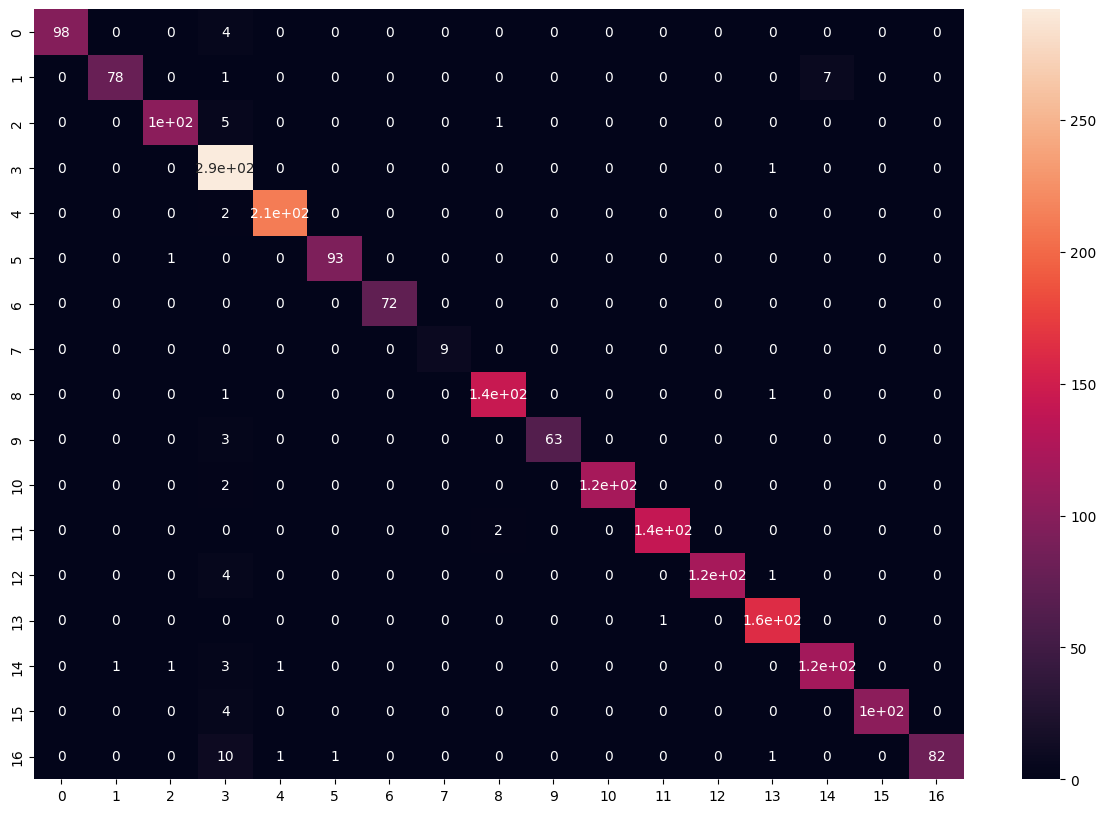

In [40]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

##Model Saving

In [41]:
pickle.dump(cv, open("/content/transform.pkl", "wb"))
pickle.dump(model, open("/content/model.pkl", "wb"))

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('/languageDataset.csv')
X = data["Text"]
y = data["Language"]
le = LabelEncoder() 
y = le.fit_transform(y)
data_list = []
for text in X:

        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()

        data_list.append(text)
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)



MultinomialNB()

In [16]:
import pickle
pickle.dump(cv, open("/content/transform.pkl", "wb"))
pickle.dump(model, open("/content/model.pkl", "wb"))